## <u>Prostate Cancer Ananlysis and prediction Preview 1</u>

### Importing libraries 

In [1]:
#importing pandas as pd for data manipulation and reading of data from directories 
import pandas as pd
import numpy as np

#importing seaborn and matplot helps with data visulization for exploratory data analysis 
#seaborn library is built upon the matplot framework for more beautiful visualization and seaborn has a larger visulization option
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#reading of data from the directory at which the data we want to import is being saved 
#in this project we would be naming the dataframe : (df) shorts for dataframe and commonly used in the data world

df = pd.read_csv("Prostate_Cancer.csv") #The read_csv method is used to read data ,it's a pandas function
df.sample(5) #This helps us to display a sample of 5 random set of data from the much larger dataset to see what we are working with

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
74,75,B,18,13,79,471,0.092,0.068,0.172,0.059
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
58,59,B,22,15,83,527,0.081,0.038,0.182,0.055
16,17,M,10,16,95,685,0.099,0.072,0.159,0.059
37,38,B,21,11,83,524,0.090,0.038,0.147,0.059


In [4]:
#To check the shape of our dataframe for more explict information 
df.shape

(100, 10)

#### From the above cell we can see that we are trying to get the shape interms of rows and columns to help us see the dataframe more and also give us an approach to solve the problem.

In [5]:
df.columns #df.columns helps to print out the columns in our df dataframe .

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

#### For further analysis and model building in the future we would see that the patient id column wont be needed because of it doesnt really affect the outcome of our result , so we can drop it using the pandas function drop , when using the drop function we would be specifying the axis and also the inplace parameter whether True or False to drop the column from the dataframe 

#### The Inplace function helps to drop the column either for good when using the dataframe or just for the main time while using the drop function . If the Inplace parameter is being set to true the column will be dropped for good in the dataframe , but if false it wont drop it for good but it would drop it for that time .

In [6]:
df.drop(["id"] , axis = 1  , inplace  = True) 
#the drop function is being used here to drop the id column and axis is set to 1 to drop the column if axis was set to 0 it would be dropping rows
#and the inplace parameter set to true to drop the column for good in the dataframe

In [7]:
df.columns

Index(['diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

#### We can see now that the patient id column tagged as id has being removed and  this time for good because when ever we try to use the df dataframe again we won't be finding the id column there . 

In [8]:
df.sample(5)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
56,M,10,19,126,1152,0.105,0.127,0.192,0.060
86,M,19,26,94,648,0.094,0.099,0.208,0.056
20,B,16,14,86,520,0.108,0.127,0.197,0.068
0,M,23,12,151,954,0.143,0.278,0.242,0.079
38,M,11,15,96,699,0.094,0.051,0.157,0.055


In [15]:
df.describe()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [11]:
print(f"The Unique Variables in the Diagnosis Result are : {df.diagnosis_result.unique()}")
#The unique function in the df dataframe is used to get the unique variables in the dataframe for a specified column , which we gave to the diagnosis_result column
df.diagnosis_result.value_counts()
#The value_counts function helps to count the number of times a particular variable appears or occurs in a dataframe specific for a particular as specified by the researcher

The Unique Variables in the Diagnosis Result are : ['M' 'B']


M    62
B    38
Name: diagnosis_result, dtype: int64

In [12]:
df.dtypes #the dtypes function helps us to get the datatypes in which each columns variables are being stored as
#datatypes are format in which variables are being stored as 

diagnosis_result      object
radius                 int64
texture                int64
perimeter              int64
area                   int64
smoothness           float64
compactness          float64
symmetry             float64
fractal_dimension    float64
dtype: object

<AxesSubplot:xlabel='diagnosis_result', ylabel='count'>

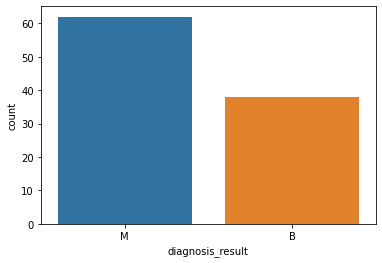

In [13]:
sns.countplot(data = df , x = "diagnosis_result" )
#seaborn countplot is used to plot a bar graph showing the literal count of each varaible in a specified column .

<AxesSubplot:xlabel='radius'>

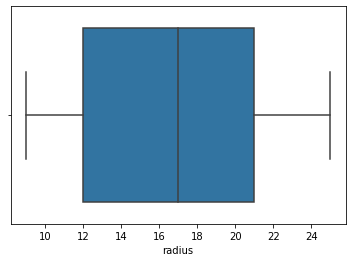

In [14]:
sns.boxplot(data = df , x = "radius")
#the seaborn boxplot is  used to check for outlier variable most of the time .
#the below chart looks to be evenly distirbuted and doesnt show signs of having any variable that seem out of the ordinary 

In [16]:
df_target = df.diagnosis_result 
#copying the diagnosis_result column into a new dataframe so we could use it for preprocessing seperate from the main dataframe

### The Copying of diagnosis_result column explained 

#### The main motive for copying the column in a new dataframe is to use it for encoding and preprocessing and still be able to use it for our modelling , but the fact is that we don't want to tamper with the main dataframe because it could be used for more data analysis to get more insights on what set of columns really affect the out come of the diagnosis result .

In [17]:
df_target.head()

0    M
1    B
2    M
3    M
4    M
Name: diagnosis_result, dtype: object

### Preprocessing Of The df_target dataframe

#### In Machine Learning , when we have data types in form of object they can't be used in the modelling phase except being encoded by scikit learn models turning the object which in lame man sense meaning letters or charcters that aren't numbers . Computers only understands numbers and not letters so we have to convert or in more scientific terms encode the characters in form of numbers.

#### We have various ways of encoding object columns in pandas and mentioning a few we have the OneHotEncoder ,LabelEncoder and the pandas get_dummies function , i personally prefer the LabelEncoder . 



In [18]:
#using the scikit learn library to import LabelEncoder for encoding of the object characters in the df_target dataframe 
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() #creating an instance of the labelencoder class for easy usage 

df_target = encoder.fit_transform(df_target) 
#this helps to fit the dataframe and also transform it into a more easier way for the computer to understand 

### Model Building 

In [23]:
from sklearn.model_selection import train_test_split
#the scikit model_selection function helps to split the dataframe into train sets and test sets 

X_train , X_test , y_train , y_test = train_test_split(df.drop(["diagnosis_result"] , axis = 1) , df_target , test_size = 0.35 , random_state=10)
#The code snippet above helps to declare the X_train and X_test and smae goes to the y_train an d y_test . 

#### Interms of Model_selection the train_test_split method helps to split the dataframe into sections of training and testing , this spliting helps us to fit the model with the train set in other words train the model with the train set and score or evaluate the model based on the test . 

#### The next code snippet where the X-train , X_test , y_train and y_test variables are being set , this line of code helps to store particular set of data into the variables declared . 
#### First of the df.drop["diagnosis_result] is stored in X_train , what we did there is drop the diagnosis_result column and leave the rest setting them into the X_train and X_test variables 
#### Secondly the df_target is our target variable set , they are stored in the y_train and y_test
#### After all variables have being mapped , we used the parameter test_size to give the percentage that should be used as the test size from the dataset given . 

In [24]:
X_train.shape

(65, 8)

In [25]:
X_train.columns

Index(['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
       'symmetry', 'fractal_dimension'],
      dtype='object')

In [29]:
from sklearn.svm import SVC
#importing the support vector machine for classification model building 
model_svc = SVC()
model_svc.fit(X_train , y_train) #training the model based on the x_train and y_train 

SVC()

In [31]:
model_svc.score(X_test , y_test) #checking the score and accuracy of our support vector machine 

0.7428571428571429

### Logistic Regression Model Building 

In [35]:
from sklearn.linear_model import LogisticRegression 
#importing the logistic regresssion model from the scikit learn library for classifiction model building 


model_lr = LogisticRegression(max_iter = 1000) 
#creating an instance of the logisitic regression model to use in the fitting of the model 
model_lr.fit(X_train , y_train) 
#model_lr.fit(x_train , y_train) is used to fit and train the model to get used to the dataset for evaluation purposes and testing for predictions

LogisticRegression(max_iter=1000)

In [36]:
model_lr.score(X_test , y_test)
#model_lr.score(x_test , y_test) , this helps to evaluate and check how our model is performing when used on the test set 

0.8571428571428571

### <u>In-conclusion</u> 
#### The Model Building phase is mostly not the end a machine learning or data science project there's more to data science than just building models to predict the outcome or how accuracte our model works . 

### <ul><li>The Support Vector Machine Model worked well with an accuracy of over 73 percentage and will do better once used with and XGBoost classifier </li><li>The Logisitic Regression Model worked well with a accuracy over 80 percentage and can also do better . </li></ul>

### <u>Things That Could be Improved in my next program </u>
### <ol><li>First i will make sure i use the MinMaxScaler from the sklearn.preprocessin libarary to scale my data down for more scalability and to make my model more efficient </li> <li>Secondly Next Project i will try to use the XGBoost Classifier to boost the accuracy of my model for more accuracy .</li><li>obviously there were not much graphs in there for exploratory data analysis to make the job easier for those who like to get insight from visuals , i wanted to use the power bi tool but i just found it a little stressing , i would use the seaborn on my next analysis on this same project to conquer my seaborn allergy .</li></ol>